# Prepare the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
import statsmodels.api as sm

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("raw_data.csv")

In [3]:
data.head()

,loan_num,request_id,lender_id,supplier_id,borrower_id,amount,age renge,status,sector,monthly house income,work status,number of employees at home,seniority of work,education,owned apartment,mortgage,ind_default
0,5947701,82958950,999488,69092759,333189646,7997.0,30-39,single parent,Energy & Electricity,"19,001-30,000",salaried employee,1,5+,high school,home owner,not mortgage,no
1,7730330,35150413,966842,64847121,202086627,69020.0,18-29,married,Banking & Capital Market,"19,001-30,000",self-employed,1,5+,Bachelor's degree,home owner,mortgage,no
2,6665403,70999432,536987,75602692,401942608,75000.0,30-39,married,Real Estate,"19,001-30,000",self-employed,1,5+,high school,home owner,not mortgage,no
3,1998459,31570339,704089,60245399,322971927,12400.0,50+,married,Energy & Electricity,"19,001-30,000",salaried employee,1,5+,high school,home owner,not mortgage,no
4,9212420,99751191,426505,15830146,998263362,99444.0,18-29,divorced,Real Estate,"19,001-30,000",self-employed,1,5+,no education,home owner,mortgage,no


# Cleaning the data

In [4]:
#transform



#There is a line with no Target that is full of NAN values so we'll remove it
data.dropna(subset=['ind_default'],inplace=True)



#replace nan

#There is 1 value of 'owned apartment' with value 0, so we will fill it with the Frequent
data['owned apartment'].replace('0', data['owned apartment'].mode().iloc[0],inplace=True)

#There is 1 value of 'education', with value 0, so we will fill it with the Frequent
data['education'].replace('0', data['education'].mode().iloc[0],inplace=True)

# Replace NaN in 'education' values with the Frequent
data['education'].fillna(data['education'].mode().iloc[0], inplace=True)

#There is 1 value that is NAN, so we will fill it with the Frequent
data['ind_default'].fillna(data['ind_default'].mode().iloc[0],inplace=True)

#There is 2 value that is NAN, so we will fill it with the Frequent
data['work status'].fillna(data['work status'].mode().iloc[0],inplace=True)

#There is 1 value that is NAN, so we will fill it with the Frequent
data['amount'].fillna(data['amount'].median(),inplace=True)








#Binary

data['is_return'] = data['ind_default'].map({'yes': 0, 'no': 1})
data['has_mortgage'] = data['mortgage'].map({'mortgage': 1, 'not mortgage': 0})
data['is_owned_apartment'] = data['owned apartment'].map({'home owner': 1, 'not home owner': 0})







#mapping order

education_mapping = {
    'no education': 1,
    'high school': 2,
    "Bachelor's degree": 3,
    "master's degree": 4,
    'PhD': 5
}
# Map education levels to ordinal numbers
data['education'] = data['education'].map(education_mapping)




seniority_mapping = {
    'unemployed': 1,
    '0-2': 2,
     '0-3': 3,
    '5+': 4
}
data['seniority_of_work'] = data['seniority of work'].map(seniority_mapping)



income = {
    '0-12,000': 1,
    '12,001-19,000': 2,
     '19,001-30,000': 3
}
data['monthly house income'] = data['monthly house income'].map(income)






age = {
    '18-29' :1,
    '30-39': 2,
     '40-49': 3,
     '50+': 3
}
data['age renge'] = data['age renge'].map(age)









#remove duplicate columns
data = data.drop('ind_default', axis=1)
data = data.drop('mortgage', axis=1)
data = data.drop('seniority of work', axis=1)
data = data.drop('owned apartment', axis=1)



# EDA

# ind_default

In [5]:
print("Frequent:",data['is_return'].value_counts().idxmax())

Frequent: 1


In [6]:
grouped = data["is_return"].value_counts(dropna=False).reset_index()
grouped = grouped.rename(columns = {'index' : "is_paid", "is_return" : 'Count'})
grouped

,is_paid,Count
0,1,14963
1,0,119


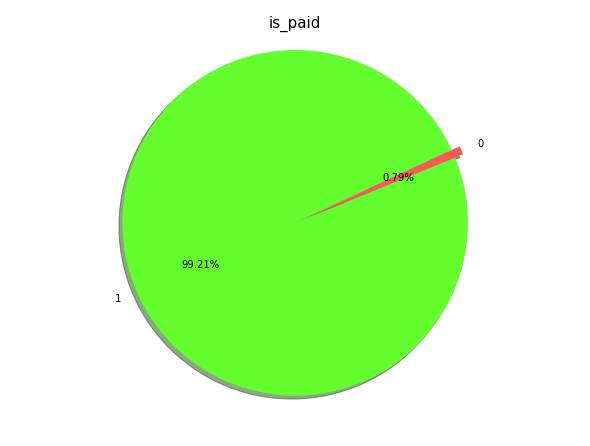

In [7]:
colors = ["#64FE2E","#FA5858"]
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
is_paid = grouped['is_paid']
Count = grouped['Count']
plt.suptitle('is_paid', fontsize=15)
ax.pie(Count, labels = is_paid,autopct='%1.2f%%',explode=[0,0.05],shadow=True,
      colors=colors, startangle=25)
plt.show()

<font size="5">A large majority of people repay the loan in full</font>

# mortgage

In [8]:
print("Frequent:",data['has_mortgage'].value_counts().idxmax())

Frequent: 0


In [9]:
grouped = data["has_mortgage"].value_counts().reset_index()
grouped = grouped.rename(columns = {'index' : "has_mortgage", "has_mortgage" : 'Count'})
grouped

,has_mortgage,Count
0,0,11110
1,1,3972


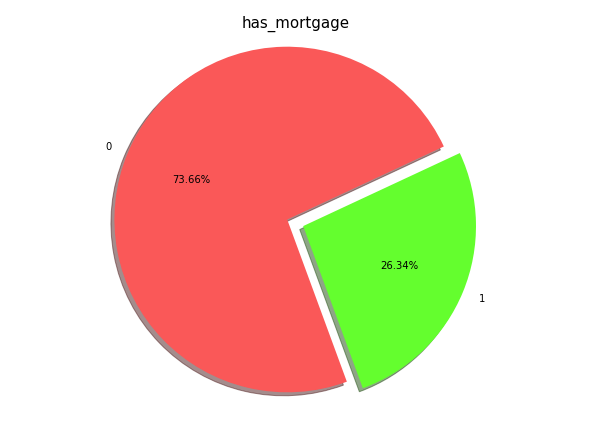

In [10]:
colors = ["#FA5858","#64FE2E"]
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
has_mortgage = grouped['has_mortgage']
Count = grouped['Count']
plt.suptitle('has_mortgage', fontsize=15)
ax.pie(Count, labels = has_mortgage,autopct='%1.2f%%',explode=[0.05,0.05],shadow=True,
      colors=colors, startangle=25)
plt.show()

<font size="5"> Most people do not have a mortgage</font>

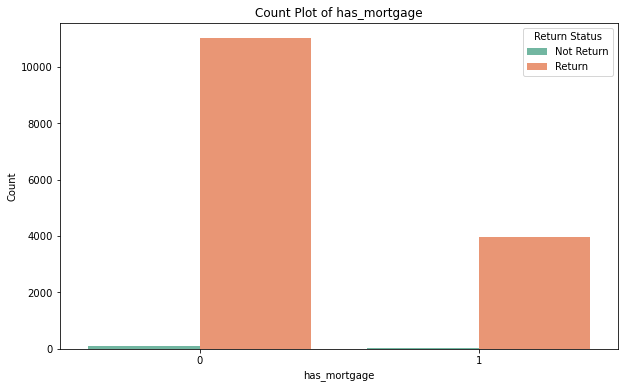

In [11]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='has_mortgage', hue='is_return', data=data, palette="Set2")

# Add labels and title
plt.xlabel('has_mortgage')
plt.ylabel('Count')
plt.title('Count Plot of has_mortgage')

# Show the plot
plt.xticks(range(0, 2))
plt.legend(title='Return Status', loc='upper right', labels=['Not Return', 'Return'])
plt.show()

<font size="5"> This graph doesn't help much so let's go deeper</font>

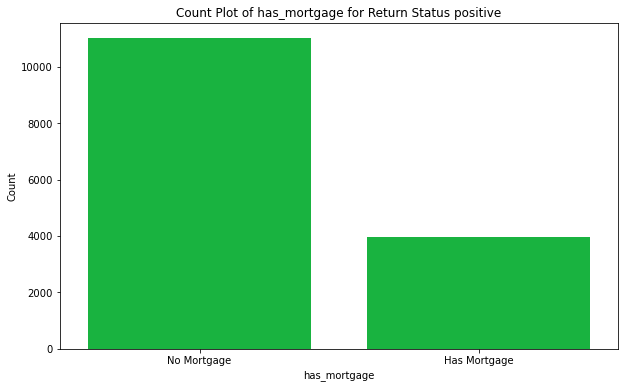

In [12]:
# Filter the DataFrame to include only rows where "is_return" is equal to 1
return_data = data[data['is_return'] == 1]

# Create a count plot for "has_mortgage" in the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(x='has_mortgage', data=return_data,  color=(0, 0.8, 0.2))

# Add labels and title
plt.xlabel('has_mortgage')
plt.ylabel('Count')
plt.title('Count Plot of has_mortgage for Return Status positive')

# Show the plot
plt.xticks(range(0, 2), ['No Mortgage', 'Has Mortgage'])
plt.show()

<font size="5"> It can be seen that out of all those who returned a loan, people who do not have a mortgage have a ratio of more than 2 times more then have a mortgage</font>

# owned apartment

In [13]:
print("Frequent:",data['is_owned_apartment'].value_counts().idxmax())

Frequent: 1


In [14]:
grouped = data["is_owned_apartment"].value_counts().reset_index()
grouped = grouped.rename(columns = {'index' : "is_owned_apartment", "is_owned_apartment" : 'Count'})
grouped

,is_owned_apartment,Count
0,1,9250
1,0,5832


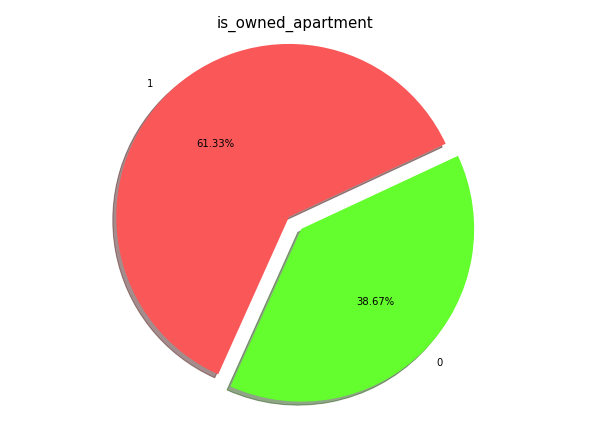

In [15]:
colors = ["#FA5858","#64FE2E"]
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
is_owned_apartment = grouped['is_owned_apartment']
Count = grouped['Count']
plt.suptitle('is_owned_apartment', fontsize=15)
ax.pie(Count, labels = is_owned_apartment	,autopct='%1.2f%%',explode=[0.05,0.05],shadow=True,
      colors=colors, startangle=25)
plt.show()

<font size="5"> Most people own an apartment</font>

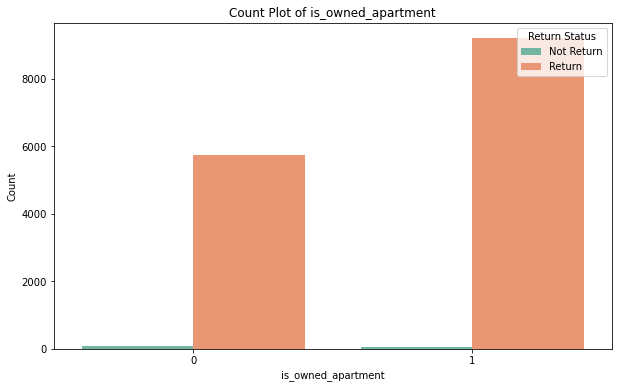

In [16]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='is_owned_apartment', hue='is_return', data=data, palette="Set2")

# Add labels and title
plt.xlabel('is_owned_apartment')
plt.ylabel('Count')
plt.title('Count Plot of is_owned_apartment')

# Show the plot
plt.xticks(range(0, 2))
plt.legend(title='Return Status', loc='upper right', labels=['Not Return', 'Return'])
plt.show()

<font size="5"> This graph doesn't help much so let's go deeper</font>

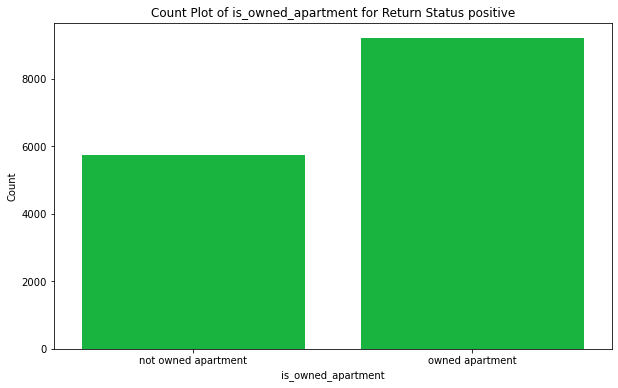

In [17]:
# Filter the DataFrame to include only rows where "is_return" is equal to 1
return_data = data[data['is_return'] == 1]

# Create a count plot for "has_mortgage" in the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(x='is_owned_apartment', data=return_data,  color=(0, 0.8, 0.2))

# Add labels and title
plt.xlabel('is_owned_apartment')
plt.ylabel('Count')
plt.title('Count Plot of is_owned_apartment for Return Status positive')

# Show the plot
plt.xticks(range(0, 2), ['not owned apartment', 'owned apartment'])
plt.show()

<font size="5"> It can be seen that of those who do not pay back a loan, most people are not apartment owners</font>

# education

In [18]:
print("Frequent:",data['education'].value_counts().idxmax())

Frequent: 2


In [19]:
grouped = data["education"].value_counts().reset_index()
grouped = grouped.rename(columns = {'index' : "education", "education" : 'Count'})
grouped

,education,Count
0,2,6046
1,3,4612
2,1,4140
3,4,187
4,5,97


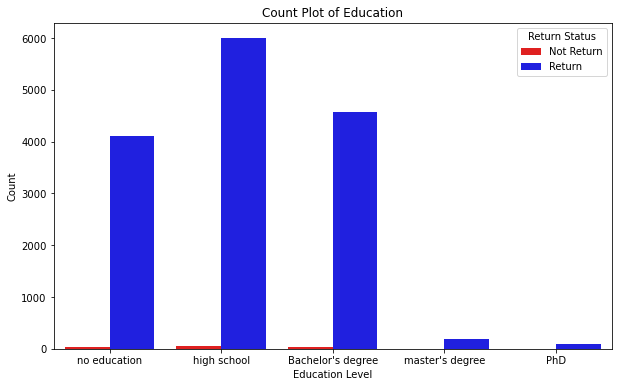

In [20]:
# Define the desired order of education levels
education_order = ["no education", "high school", "Bachelor's degree", "master's degree", "PhD"]

# Define custom colors for 'Return' and 'Not Return'
custom_palette = {1: "blue", 0: "red"}

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='is_return', data=data, palette=custom_palette)

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count Plot of Education')

# Show the plot
plt.xticks(range(0, 5), education_order)
plt.legend(title='Return Status', loc='upper right', labels=['Not Return', 'Return'])
plt.show()







<font size="5"> This graph doesn't help much so let's go deeper</font>

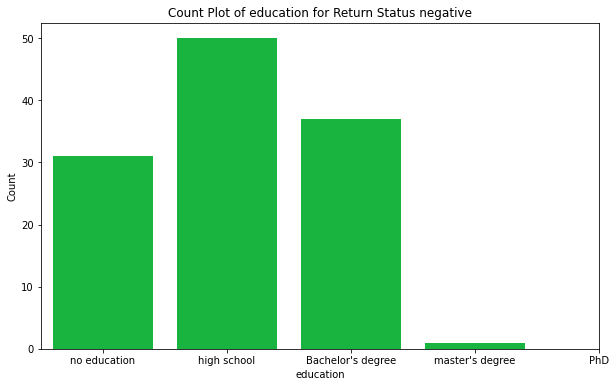

In [21]:
# Filter the DataFrame to include only rows where "is_return" is equal to 1
return_data = data[data['is_return'] == 0]

# Create a count plot for "has_mortgage" in the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=return_data,  color=(0, 0.8, 0.2))

# Add labels and title
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Count Plot of education for Return Status negative')

# Show the plot
plt.xticks(range(0, 5), ["no education", "high school", "Bachelor's degree", "master's degree", "PhD"])
plt.show()


<font size="5">It can be seen that the higher the education, the fewer people who have not returned a loan</font>

# seniority of work

In [22]:
print("Frequent:",data['seniority_of_work'].value_counts().idxmax())

Frequent: 4


In [23]:
grouped = data["seniority_of_work"].value_counts().reset_index()
grouped = grouped.rename(columns = {'index' : "seniority_of_work", "seniority_of_work" : 'Count'})
grouped

,seniority_of_work,Count
0,4,10626
1,3,4240
2,2,111
3,1,105


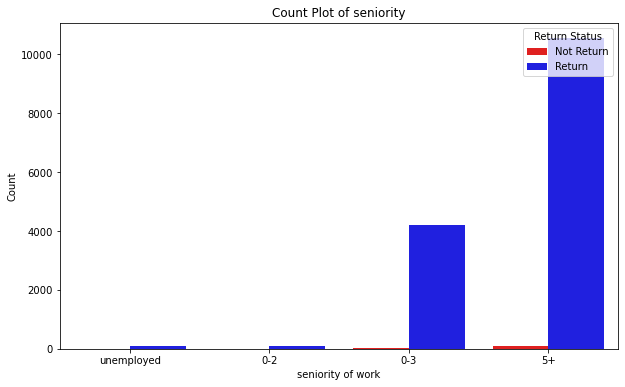

In [24]:
# Define the desired order of education levels
seniority_order = ['unemployed','0-2',   '0-3','5+']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='seniority_of_work', hue='is_return', data=data, palette=custom_palette)

# Add labels and title
plt.xlabel('seniority of work')
plt.ylabel('Count')
plt.title('Count Plot of seniority')

# Show the plot
plt.xticks(range(0,4), seniority_order)
plt.legend(title='Return Status', loc='upper right', labels=['Not Return', 'Return'])
plt.show()


<font size="5"> This graph doesn't help much so let's go deeper</font>

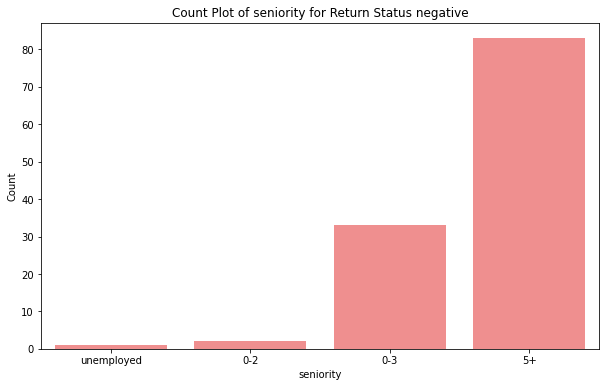

In [25]:
# Filter the DataFrame to include only rows where "is_return" is equal to 1
not_return_data = data[data['is_return'] == 0]

# Create a count plot for "has_mortgage" in the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(x='seniority_of_work', data=not_return_data,  color=(1.0, 0.5, 0.5))

# Add labels and title
plt.xlabel('seniority')
plt.ylabel('Count')
plt.title('Count Plot of seniority for Return Status negative')

# Show the plot
plt.xticks(range(0, 4), seniority_order)
plt.show()





<font size="5"> There is nothing interesting here given that there is a large majority in the data that has 0-3,5 seniority of work</font>

# number of employees at home

In [26]:
print("center measures")
print("Frequent:",data['number of employees at home'].value_counts().idxmax())
print("Median:",data['number of employees at home'].median())
print("Mean:",data['number of employees at home'].mean())
print("Middle of range:",(data['number of employees at home'].min()+data['number of employees at home'].max())/2)

center measures
Frequent: 1
Median: 1.0
Mean: 1.0712107147593157
Middle of range: 1.0


In [27]:
print("dispersion indices")
print("Range:",data['number of employees at home'].max()-data['number of employees at home'].min())
q3, q1 = np.percentile(data["number of employees at home"], [75 ,25])
print("IQR:",q3 - q1)
print("Std:",data['number of employees at home'].std())

dispersion indices
Range: 2
IQR: 0.0
Std: 0.30680020174711076


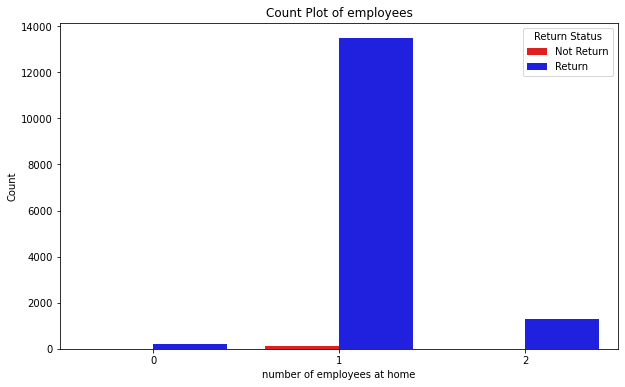

In [28]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='number of employees at home', hue='is_return', data=data, palette=custom_palette)

# Add labels and title
plt.xlabel('number of employees at home')
plt.ylabel('Count')
plt.title('Count Plot of employees')

# Show the plot
plt.xticks(range(0,3))
plt.legend(title='Return Status', loc='upper right', labels=['Not Return', 'Return'])
plt.show()

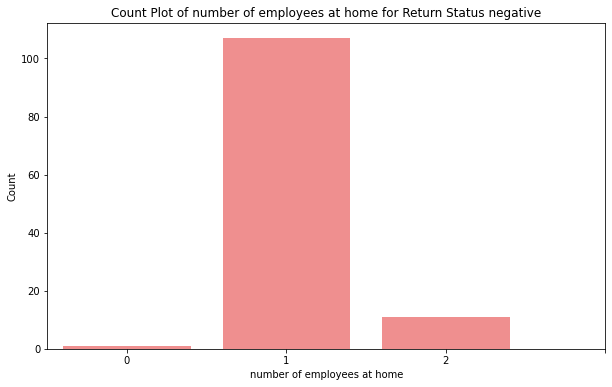

In [29]:
# Filter the DataFrame to include only rows where "is_return" is equal to 1
return_data = data[data['is_return'] == 0]

# Create a count plot for "has_mortgage" in the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(x='number of employees at home', data=return_data,  color=(1.0, 0.5, 0.5))

# Add labels and title
plt.xlabel('number of employees at home')
plt.ylabel('Count')
plt.title('Count Plot of number of employees at home for Return Status negative')

# Show the plot
plt.xticks(range(0,4))
plt.show()



<font size="5"> There is nothing interesting here given that there is a large majority in the data that only has 1 employee</font>

# work status

In [30]:
print("Frequent:",data['work status'].value_counts().idxmax())

Frequent: salaried employee


In [31]:
grouped = data["work status"].value_counts(dropna=False).reset_index()
grouped = grouped.rename(columns = {'index' : "work status", "work status" : 'Count'})
grouped

,work status,Count
0,salaried employee,10031
1,self-employed,4023
2,retired,958
3,not working,70


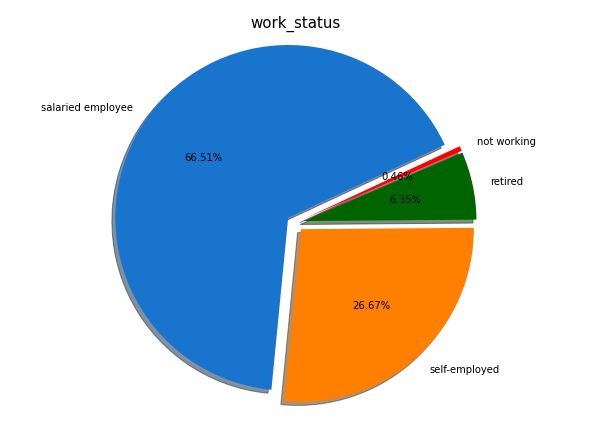

In [32]:
colors = ["#1874CD","#FF8000","#006400","#FF0000"]
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
work_status = grouped['work status']
Count = grouped['Count']
plt.suptitle('work_status', fontsize=15)
ax.pie(Count, labels = work_status,autopct='%1.2f%%',explode=[0.05,0.05,0.05,0.05],shadow=True,
      colors=colors, startangle=25)
plt.show()

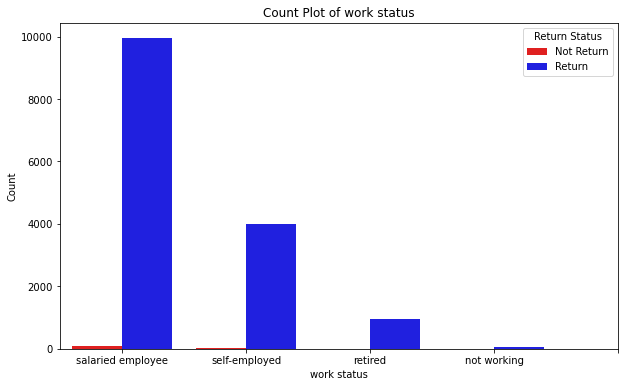

In [33]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='work status', hue='is_return', data=data, palette=custom_palette)

# Add labels and title
plt.xlabel('work status')
plt.ylabel('Count')
plt.title('Count Plot of work status')

# Show the plot
plt.xticks(range(0, 5))
plt.legend(title='Return Status', loc='upper right', labels=['Not Return', 'Return'])
plt.show()



# amount

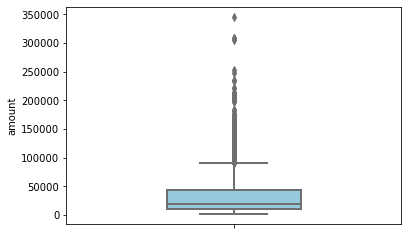

In [34]:
b = sns.boxplot(data = data,           
                    y = "amount",       # y axis column from data
                    width = 0.4,        # The width of the boxes
                    color = "skyblue",  # Box colour
                    linewidth = 2,      # Thickness of the box lines
                    showfliers = True)  # Sop showing the fliers

There are many outliers and our goal in the end is to generalize the population so we will remove them for now

In [35]:
# Calculate the IQR (Interquartile Range)
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
filtered_data = data[(data['amount'] >= lower_bound) & (data['amount'] <= upper_bound)]

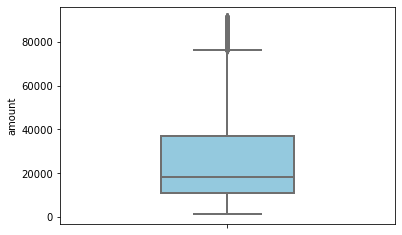

In [36]:
b = sns.boxplot(data = filtered_data,           
                    y = "amount",       # y axis column from data
                    width = 0.4,        # The width of the boxes
                    color = "skyblue",  # Box colour
                    linewidth = 2,      # Thickness of the box lines
                    showfliers = True)  # Sop showing the fliers

# Correlation

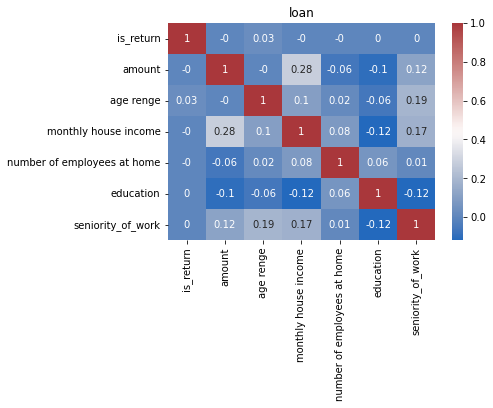

In [37]:
#Correlation

cor_data = data[[ 'is_return','amount', 'age renge',  'monthly house income',
                 'number of employees at home', 'education', 'seniority_of_work']]
matrix = cor_data.corr().round(2)
sns.heatmap(matrix, cmap='vlag',annot=True)
plt.title('loan')
plt.show()

It is possible that the relationships are weak because we are not using continuous variables

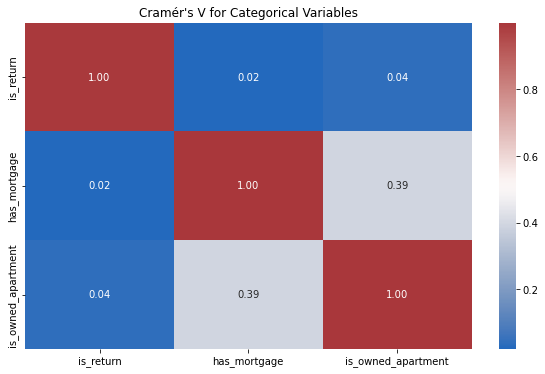

In [39]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = np.sum(contingency_table).sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))
    return cramers_v

# Calculate Cramér's V for the selected categorical columns
categorical_columns = ['is_return','has_mortgage', 'is_owned_apartment']
cramers_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))), columns=categorical_columns, index=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Create a heatmap of Cramér's V
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_matrix, cmap='vlag', annot=True, fmt=".2f")
plt.title('Cramér\'s V for Categorical Variables')
plt.show()

Even here the correlation is weak

In [40]:
# List of categorical columns to analyze
categorical_columns = [ 'age renge',  'monthly house income',
                 'number of employees at home', 'education',
                  'has_mortgage', 'is_owned_apartment', 'seniority_of_work'] 

# Create a contingency table and perform the chi-squared test for each column
for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(data['is_return'], data[column])
    
    # Perform the chi-squared test
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    
    # Print column name, chi-squared statistic, and p-value
    print(f"Column: {column}")
    print("Chi-squared statistic:", chi2)
    print("p-value:", p)
    print("\n")

Column: age renge
Chi-squared statistic: 18.438666454242348
p-value: 9.910474596379938e-05


Column: monthly house income
Chi-squared statistic: 0.3740341201274009
p-value: 0.8294295861431276


Column: number of employees at home
Chi-squared statistic: 0.3416808246661911
p-value: 0.842956088133302


Column: education
Chi-squared statistic: 1.1331506394679738
p-value: 0.8889774512716784


Column: has_mortgage
Chi-squared statistic: 7.197960985379274
p-value: 0.007298646214406046


Column: is_owned_apartment
Chi-squared statistic: 25.051321096808717
p-value: 5.582449457402634e-07


Column: seniority_of_work
Chi-squared statistic: 1.5050045052291368
p-value: 0.6811157757448192




In [41]:
import pandas as pd

# Assuming you have a DataFrame called 'data' with columns 'is_return' and 'amount'
# Replace 'data' with your actual DataFrame name

# Calculate the mean loan amount for returns (is_return = 1)
mean_return_amount = data[data['is_return'] == 1]['amount'].mean()

# Calculate the mean loan amount for not returns (is_return = 0)
mean_not_return_amount = data[data['is_return'] == 0]['amount'].mean()

print("Mean Loan Amount for Returns (is_return = 1):", mean_return_amount)
print("Mean Loan Amount for Not Returns (is_return = 0):", mean_not_return_amount)


Mean Loan Amount for Returns (is_return = 1): 31906.028938047184
Mean Loan Amount for Not Returns (is_return = 0): 32616.95798319328


There is not much information here, but it is enough that we see that the averages are close, you can tell that the price is not real with a strong connection to loan repayment

After all the tests and tests, the chi2 test worked best and the parameters with the strongest correlation to the goal are:
has_mortgage
is_owned_apartment
age range

# Model

In [42]:
# Assuming you have a DataFrame called 'data' with the columns you mentioned
X = data[['amount', 'age renge', 'monthly house income',
           'number of employees at home', 'education',
          'has_mortgage', 'is_owned_apartment', 'seniority_of_work']]
y = data['is_return']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)




Accuracy: 0.9900563473649321


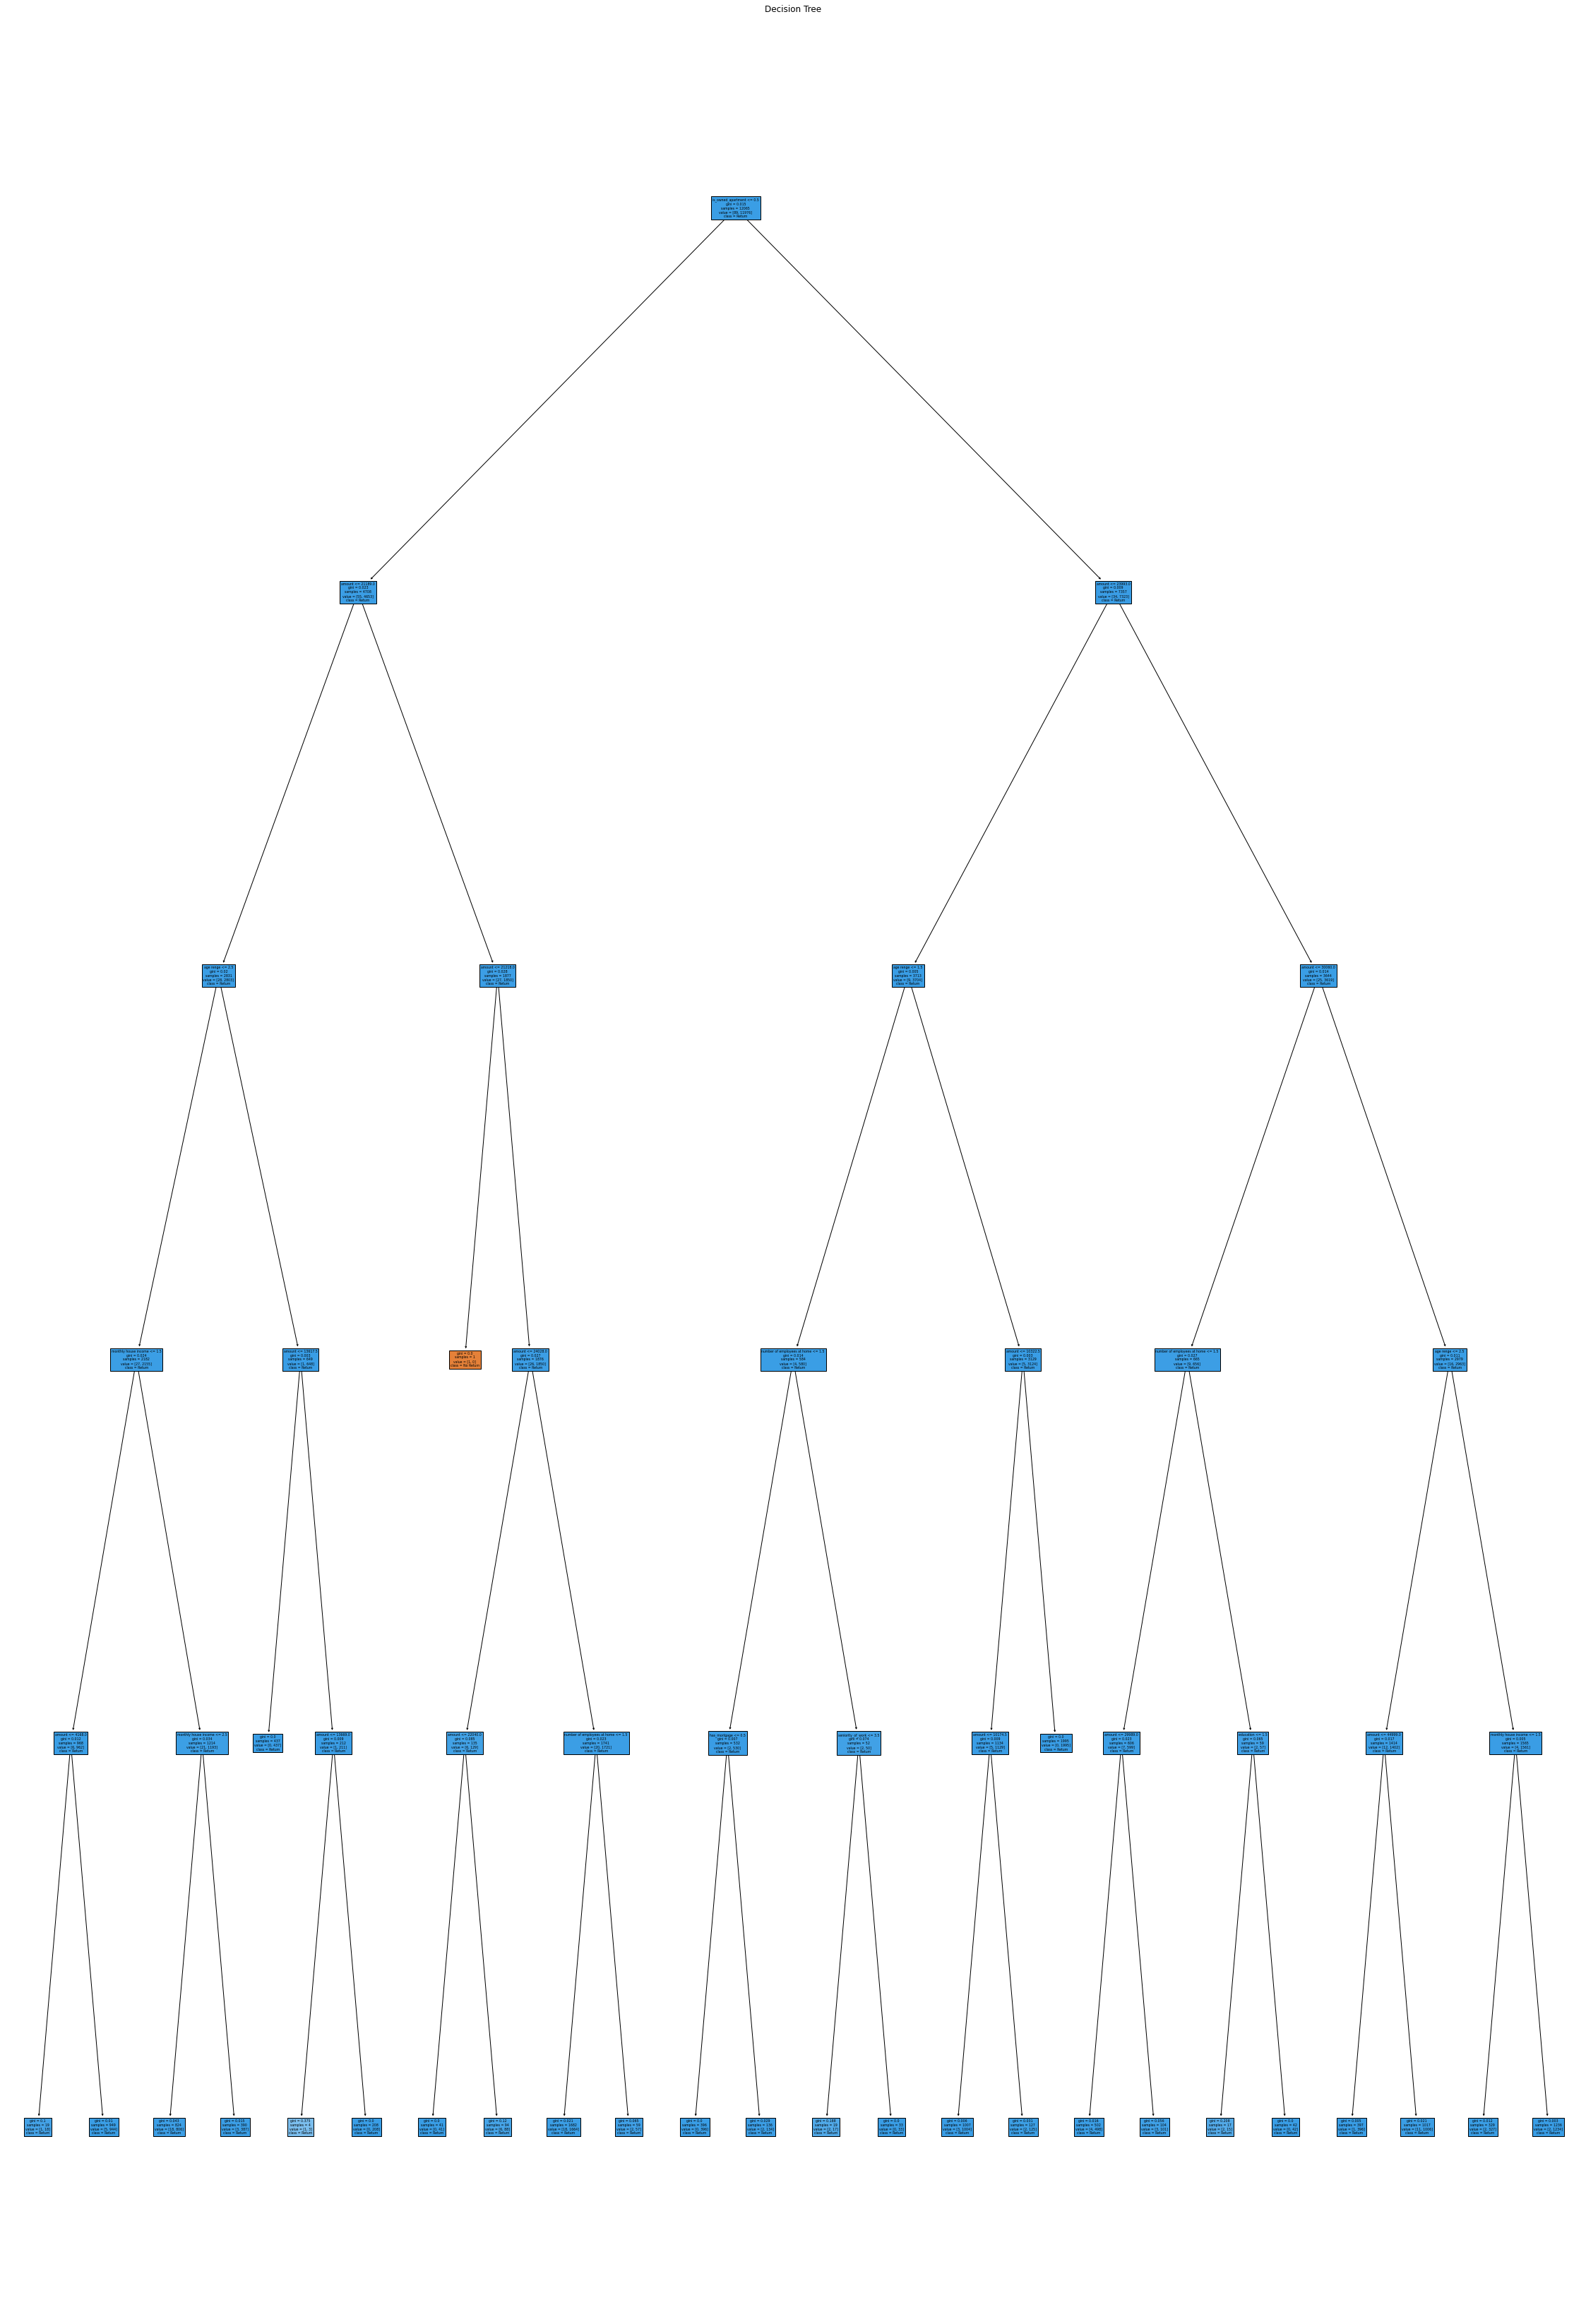

In [43]:
# Visualize the decision tree
plt.figure(figsize=(40, 60))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No Return", "Return"])
plt.title("Decision Tree")
plt.show()

In [44]:
# Predictions on the training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Create confusion matrices
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Train Set):")
print(confusion_matrix_train)

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix_test)

Confusion Matrix (Train Set):
[[    1    88]
 [    0 11976]]

Confusion Matrix (Test Set):
[[   0   30]
 [   0 2987]]


<font size="5">In my assignment there was no need to run models but I still added it to better understand the behavior of the data, as we can see the model always predicted that a loan is not returned as you can see its accuracy is high but if we dig deeper we will notice that the FN is very, very low which shows that the model will not predict well the cases in which it is necessary to predict who does __not__ repays a loan</font>